In [ ]:
from neo4j import GraphDatabase
import pandas as pd

# URI examples: "neo4j://localhost", "neo4j+s://xxx.databases.neo4j.io"
URI = "bolt://localhost:7687"
AUTH = ("neo4j",'healthcare-analytics')

with GraphDatabase.driver(URI, auth=AUTH) as driver:
    driver.verify_connectivity()
    

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import time


In [ ]:
with driver.session(database="neo4j") as session:
    result = session.run("MATCH (n) RETURN count(n)")
    print("Numero di nodi:", result.single()[0])

C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\2016077693.py:1: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:


Numero di nodi: 11381


In [ ]:
query = '''CALL db.labels()'''
with driver.session() as session:
    result = session.run(query)
    label = [record.data() for record in result]
print(label)
labels = pd.DataFrame(label)
labels

[{'label': 'Drug'}, {'label': 'Case'}, {'label': 'Reaction'}, {'label': 'ReportSource'}, {'label': 'Outcome'}, {'label': 'Therapy'}, {'label': 'Manufacturer'}, {'label': 'AgeGroup'}]


C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\3374411662.py:2: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


,label
0,Drug
1,Case
2,Reaction
3,ReportSource
4,Outcome
5,Therapy
6,Manufacturer
7,AgeGroup


In [ ]:
query = '''CALL db.schema.nodeTypeProperties()
YIELD nodeType, propertyName, propertyTypes
RETURN nodeType, collect(propertyName)
ORDER BY nodeType
'''
pd.set_option('display.max_colwidth', None)
with driver.session(database="neo4j") as session:
    result = session.run(query)
    node_properties = [record.data() for record in result]
node_properties = pd.DataFrame(node_properties)
node_properties

C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\1661215092.py:7: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:
Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Procedure.ProcedureWarning} {category: GENERIC} {title: The query used a procedure that generated a warning.} {description: The query used a procedure that generated a warning. (The field `propertyTypes` will change output format in the next major version.)} {position: line: 1, column: 1, offset: 0} for query: 'CALL db.schema.nodeTypeProperties()\nYIELD nodeType, propertyName, propertyTypes\nRETURN nodeType, collect(propertyName)\nORDER BY nodeType\n'


,nodeType,collect(propertyName)
0,:`AgeGroup`,[ageGroup]
1,:`Case`,"[primaryid, age, ageUnit, gender, eventDate, reportDate, reporterOccupation]"
2,:`Drug`,"[name, primarySubstabce]"
3,:`Manufacturer`,[manufacturerName]
4,:`Outcome`,"[code, outcome]"
5,:`Reaction`,[description]
6,:`ReportSource`,"[name, code]"
7,:`Therapy`,[primaryid]


In [ ]:
query = '''CALL db.relationshipTypes()'''
with driver.session(database="neo4j") as session:
    result = session.run(query)
    relations = [record.data() for record in result]
relation = pd.DataFrame(relations)
relation

C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\3570176506.py:2: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:


,relationshipType
0,REGISTERED
1,FALLS_UNDER
2,RESULTED_IN
3,HAS_REACTION
4,REPORTED_BY
5,IS_PRIMARY_SUSPECT
6,IS_SECONDARY_SUSPECT
7,IS_CONCOMITANT
8,IS_INTERACTING
9,RECEIVED


In [ ]:
query = '''CALL db.schema.relTypeProperties()
YIELD relType, propertyName, propertyTypes
RETURN relType, collect(propertyName)
ORDER BY relType
'''
pd.set_option('display.max_colwidth', None)
with driver.session(database="neo4j") as session:
    result = session.run(query)
    node_properties = [record.data() for record in result]
node_properties = pd.DataFrame(node_properties)
node_properties

C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\4006602913.py:7: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:


Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Procedure.ProcedureWarning} {category: GENERIC} {title: The query used a procedure that generated a warning.} {description: The query used a procedure that generated a warning. (The field `propertyTypes` will change output format in the next major version.)} {position: line: 1, column: 1, offset: 0} for query: 'CALL db.schema.relTypeProperties()\nYIELD relType, propertyName, propertyTypes\nRETURN relType, collect(propertyName)\nORDER BY relType\n'


,relType,collect(propertyName)
0,:`FALLS_UNDER`,[]
1,:`HAS_REACTION`,[]
2,:`IS_CONCOMITANT`,"[doseAmount, doseUnit, drugSequence, route, indication]"
3,:`IS_INTERACTING`,"[doseAmount, doseUnit, drugSequence, route, indication]"
4,:`IS_PRIMARY_SUSPECT`,"[doseAmount, doseUnit, drugSequence, route, indication]"
5,:`IS_SECONDARY_SUSPECT`,"[doseAmount, doseUnit, drugSequence, route, indication]"
6,:`PRESCRIBED`,"[drugSequence, startYear, endYear]"
7,:`RECEIVED`,[]
8,:`REGISTERED`,[]
9,:`REPORTED_BY`,[]


C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\2750009455.py:4: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


Total nodes: 11381


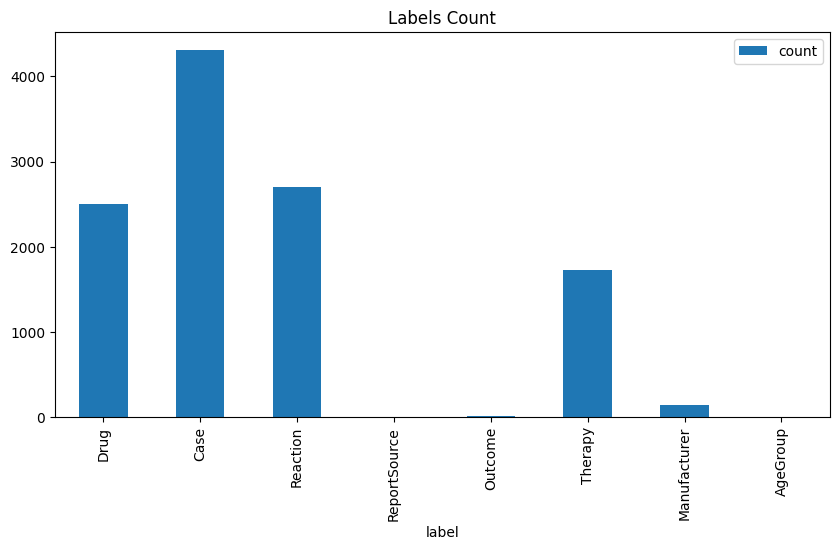

In [ ]:
count_label = []
name_label = []
somma = 0
with driver.session() as session:
    for i in label:
        label = i['label']
        query = f'''MATCH (n:{label}) return count(n) as {label}'''
        name_label.append(label)
        count_label.append(session.run(query).single()[0])
        somma += count_label[-1]

labels_count = pd.DataFrame({'label': name_label, 'count': count_label})
labels_count.plot(kind='bar', x='label', y='count', figsize=(10, 5), title='Labels Count')
print(f'Total nodes: {somma}')


C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\2289183775.py:4: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


Total relations: 122906


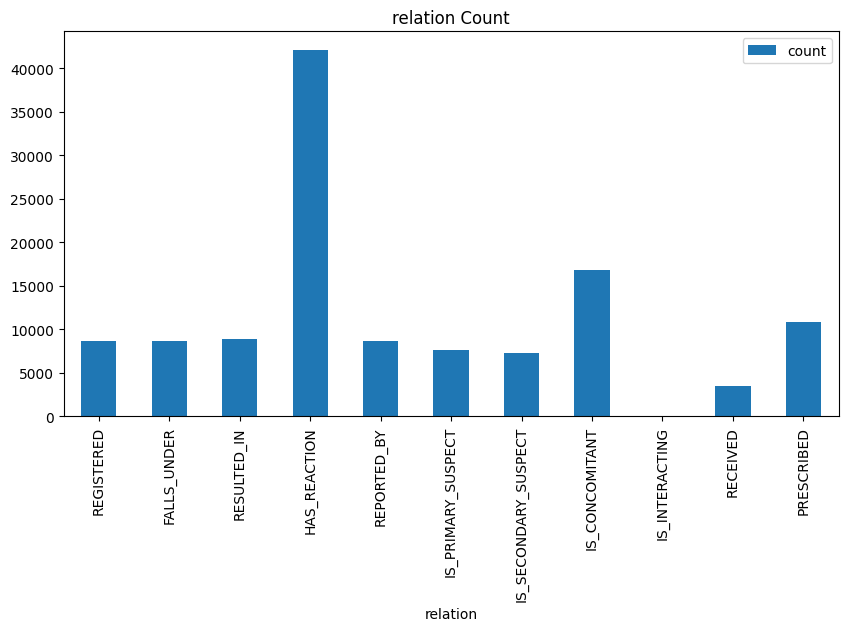

In [ ]:
count_relation = []
name_relation = []
somma = 0
with driver.session() as session:
    for i in relations:
        rel = i['relationshipType']
        query = f'''MATCH (n)-[r:{rel}]-(b) return count(r) as {rel}'''
        name_relation.append(rel)
        count_relation.append(session.run(query).single()[0])
        somma += count_relation[-1]
labels_count = pd.DataFrame({'relation': name_relation, 'count': count_relation})
labels_count.plot(kind='bar', x='relation', y='count', figsize=(10, 5), title='relation Count')
print(f'Total relations: {somma}')


In [ ]:
with driver.session() as session:
    result = session.run(query)
    data = [record.data() for record in result]

C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\1143392346.py:1: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


In [ ]:
query = '''MATCH (a)-[r]->(b)
RETURN 
  labels(a) AS from_node_labels, 
  type(r) AS relationship_type, 
  labels(b) AS to_node_labels, 
  count(*) AS occurrences
ORDER BY occurrences DESC'''
with driver.session(database="neo4j") as session:
    result = session.run(query)
    node_properties = [record.data() for record in result]
node_properties = pd.DataFrame(node_properties)
node_properties


C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\3984384965.py:8: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:


,from_node_labels,relationship_type,to_node_labels,occurrences
0,[Case],HAS_REACTION,[Reaction],21069
1,[Case],IS_CONCOMITANT,[Drug],8393
2,[Therapy],PRESCRIBED,[Drug],5441
3,[Case],RESULTED_IN,[Outcome],4461
4,[Manufacturer],REGISTERED,[Case],4307
5,[Case],FALLS_UNDER,[AgeGroup],4307
6,[Case],REPORTED_BY,[ReportSource],4307
7,[Case],IS_PRIMARY_SUSPECT,[Drug],3830
8,[Case],IS_SECONDARY_SUSPECT,[Drug],3616
9,[Case],RECEIVED,[Therapy],1721


# Exploratory analysis

In [ ]:
query = '''
CALL gds.graph.project(
  'myGraph',
  '*',
  '*'
);
'''

with driver.session(database="neo4j") as session:
    session.run(query)

query = '''
CALL gds.wcc.stats('myGraph')
YIELD componentCount;
'''


with driver.session() as session:
    result= session.run(query)
    number_components = result.single()['componentCount']
print("Numero di componenti connesse:", number_components)


C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\450264537.py:9: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:
C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\450264537.py:18: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


Numero di componenti connesse: 1


ho una sola componente connessa

Guardo la distribuzione delle reazioni ai farmaci

C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\552725758.py:6: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:


<Axes: title={'center': 'Reaction Count'}, xlabel='reaction_description'>

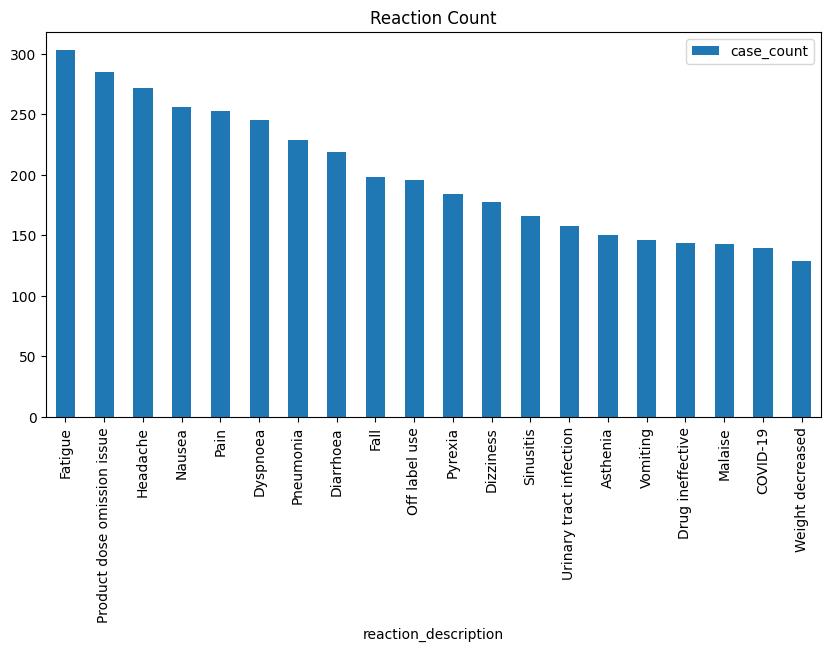

In [ ]:
query = '''
MATCH (c:Case)-[:HAS_REACTION]->(r:Reaction)
RETURN r.description AS reaction_description, count(c) AS case_count ORDER BY case_count DESC
'''

with driver.session(database="neo4j") as session:
    result = session.run(query)
    reaction = [record.data() for record in result]

reaction = pd.DataFrame(reaction)
reaction = reaction.head(20)
reaction.plot(kind='bar', x='reaction_description', y='case_count', figsize=(10, 5), title='Reaction Count')


numero di prescrizioni per farmaco

C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\2208741232.py:9: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:


               drug  prescrizioni
0       Teduglutide           200
1          REVLIMID           195
2     DEXAMETHASONE            98
3            ZANTAC            94
4        PREDNISONE            75
5  CYCLOPHOSPHAMIDE            67
6          DECADRON            60
7        VENETOCLAX            60
8          TAXOTERE            59
9   SODIUM CHLORIDE            53


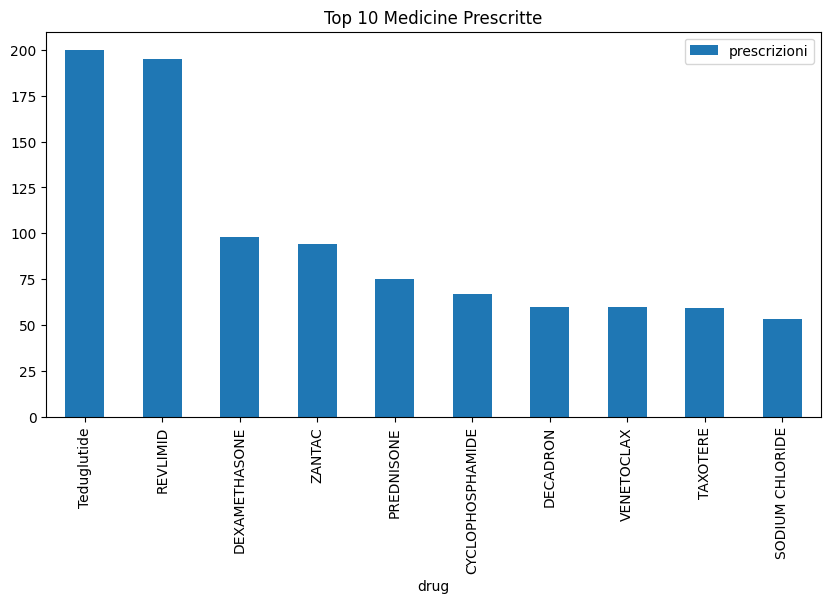

In [ ]:
query = '''
MATCH (c:Case)-[:RECEIVED]-(:Therapy)-[:PRESCRIBED]->(d:Drug)
RETURN d.name AS drug, COUNT(c) AS prescrizioni
ORDER BY prescrizioni DESC


'''

with driver.session(database="neo4j") as session:
    result = session.run(query)
    data = [record.data() for record in result]


prescrizioni = pd.DataFrame(data)
prescrizioni_10 = prescrizioni.head(10)
print(prescrizioni_10)
prescrizioni_10.plot(kind='bar', x='drug', y='prescrizioni', figsize=(10, 5), title='Top 10 Medicine Prescritte')
plt.show()
    

numero reazioni per farmaco

C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\3985908441.py:9: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:


                                    drug  reazioni
0                               REVLIMID       379
1                                CUVITRU       148
2    HUMAN NORMAL IMMUNOGLOBULIN; LIQUID       140
3                                 ZANTAC       122
4                                 LYRICA       114
..                                   ...       ...
595  EMTRICITABINE/TENOFOVIR ALAFENAMIDE         1
596                             ORAVERSE         1
597                              XALKORI         1
598                              BENEFIX         1
599               COMPARATOR CARBOPLATIN         1

[600 rows x 2 columns]


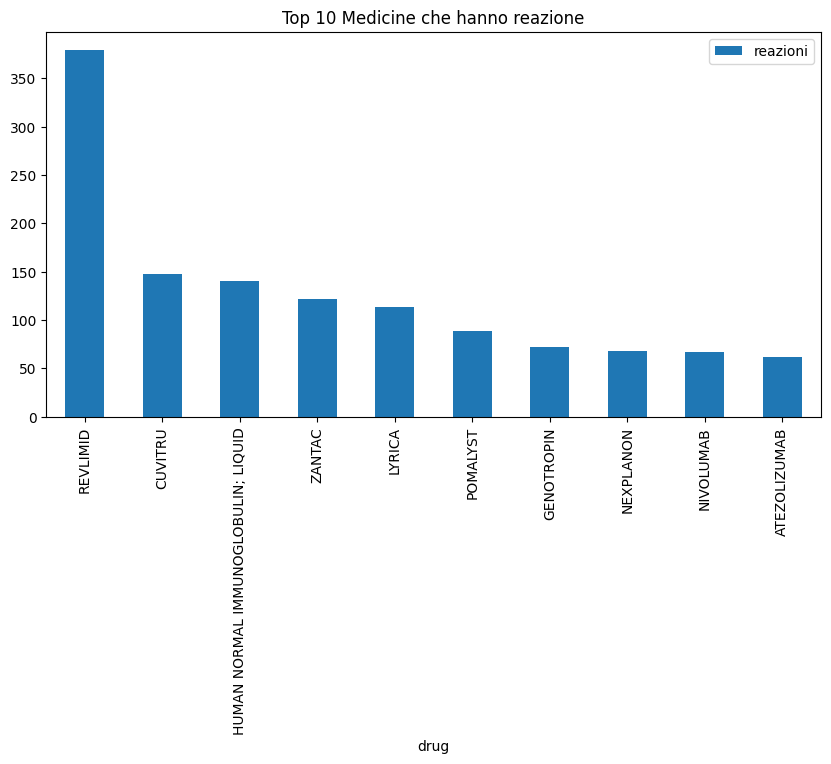

In [ ]:
query = '''
MATCH (:Case)-[:IS_PRIMARY_SUSPECT]-(d:Drug)
RETURN d.name AS drug, COUNT(*) AS reazioni
ORDER BY reazioni DESC


'''

with driver.session(database="neo4j") as session:
    result = session.run(query)
    data = [record.data() for record in result]

reazioni = pd.DataFrame(data)
reazioni_10 = reazioni.head(10)
print(reazioni)
# medicine più prescritte
reazioni_10.plot(kind='bar', x='drug', y='reazioni', figsize=(10, 5), title='Top 10 Medicine che hanno reazione')
plt.show()

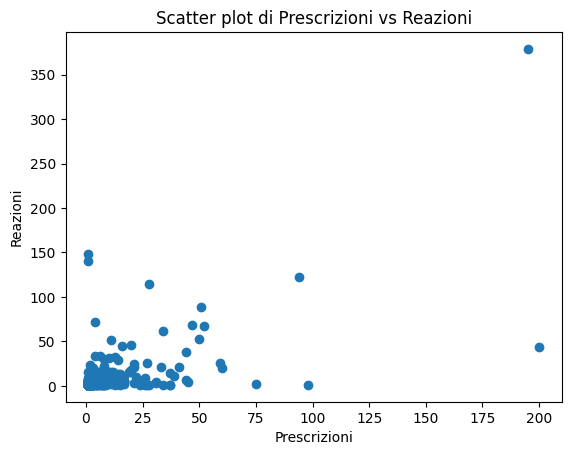

In [ ]:
# grafico prescrizioni reazioni
totale = pd.merge(reazioni, prescrizioni, on="drug", how="outer")
plt.scatter(totale['prescrizioni'], totale['reazioni'])
plt.xlabel('Prescrizioni')
plt.ylabel('Reazioni')
plt.title('Scatter plot di Prescrizioni vs Reazioni')
plt.show()

Facciamo anche un confronto con il pageRank

C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\3166148427.py:9: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:
C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\3166148427.py:25: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:


                                 drug  prescrizioni
0                         Teduglutide           200
1                            REVLIMID           195
2                       DEXAMETHASONE            98
3                              ZANTAC            94
4                          PREDNISONE            75
...                               ...           ...
1033                        CLONIDINE             1
1034              MAXIPIME (CEFEPIME)             1
1035                      NAPORAFENIB             1
1036                        SILVADENE             1
1037  ELECTROLYTES NOS;SODIUM LACTATE             1

[1038 rows x 2 columns]
                                 drug      score
0                            REVLIMID  25.837436
1                              ZANTAC  14.825303
2                           NEXPLANON   8.028501
3                            POMALYST   5.829544
4            RANITIDINE HYDROCHLORIDE   5.460613
...                               ...        ...
2495    

<Axes: title={'center': 'COUNT vs PageRank'}, xlabel='prescrizioni', ylabel='score'>

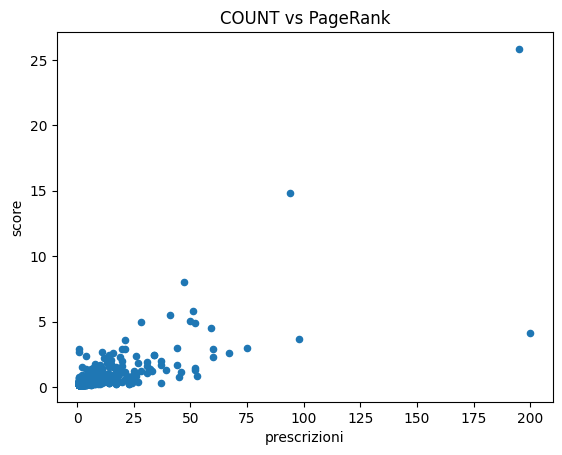

In [ ]:
query = '''
MATCH (:Therapy)-[:PRESCRIBED]->(d:Drug)
RETURN d.name AS drug, COUNT(*) AS prescrizioni
ORDER BY prescrizioni DESC


'''

with driver.session(database="neo4j") as session:
    result = session.run(query)
    data = [record.data() for record in result]

count_df = pd.DataFrame(data)
print(count_df)

query2 = '''
CALL gds.pageRank.stream('myGraph')
YIELD nodeId, score
WITH gds.util.asNode(nodeId) AS node, score
WHERE 'Drug' IN labels(node)
RETURN node.name AS drug, score
ORDER BY score DESC
'''

with driver.session(database="neo4j") as session:
    #session.run(query1)
    result = session.run(query2)
    data = [record.data() for record in result]

pagerank_df = pd.DataFrame(data)
print(pagerank_df)
# medicine più prescritte
df = pd.merge(count_df, pagerank_df, on="drug", how="outer")
df.plot(kind='scatter', x='prescrizioni', y='score', title="COUNT vs PageRank")

In [ ]:
query1 = ''' MATCH (c:Case)-[:HAS_REACTION]->(r:Reaction)
RETURN r.description, count(c) ORDER BY count(c) DESC ''' 
with driver.session(database="neo4j") as session:
    result = session.run(query1)
    data = [record.data() for record in result]
data_df = pd.DataFrame(data)
data_df.head(20)

C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\1255554014.py:3: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:


,r.description,count(c)
0,Fatigue,303
1,Product dose omission issue,285
2,Headache,272
3,Nausea,256
4,Pain,253
5,Dyspnoea,245
6,Pneumonia,229
7,Diarrhoea,219
8,Fall,198
9,Off label use,196


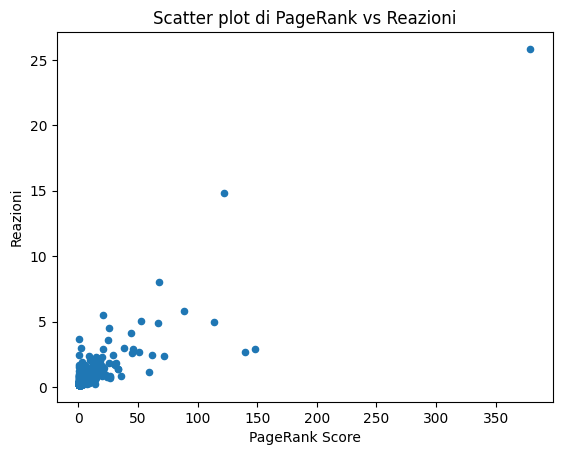

In [ ]:
df = pd.merge(reazioni, pagerank_df, on="drug", how="outer")
df.plot(kind='scatter', x='reazioni', y='score', title="COUNT vs PageRank")
plt.xlabel('PageRank Score')
plt.ylabel('Reazioni')
plt.title('Scatter plot di PageRank vs Reazioni')
plt.show()

##  prima reaserch question

In [ ]:
query = '''match (n: Outcome) return distinct n.outcome as name'''
with driver.session(database="neo4j") as session:
    result = session.run(query)
    outcome = [record.data() for record in result]
outcome = pd.DataFrame(outcome)
outcome


C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\3908778664.py:2: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:


,name
0,Death
1,Hospitalization - Initial or Prolonged
2,Other Serious (Important Medical Event)
3,Life-Threatening
4,Disability
5,Congenital Anomaly


In [ ]:

query_create = '''
CALL gds.graph.project.cypher(
  'DrugCaseReactionGraphDeath',
  '
    MATCH (d:Drug)-[:IS_PRIMARY_SUSPECT]-(c:Case)-[:HAS_REACTION]-(r:Reaction),
          (c)-[:RESULTED_IN]-(o:Outcome)
    WHERE o.outcome = "Death"
    RETURN DISTINCT id(d) AS id
    UNION
    MATCH (d:Drug)-[:IS_PRIMARY_SUSPECT]-(c:Case)-[:HAS_REACTION]-(r:Reaction),
          (c)-[:RESULTED_IN]-(o:Outcome)
    WHERE o.outcome = "Death"
    RETURN DISTINCT id(c) AS id
    UNION
    MATCH (d:Drug)-[:IS_PRIMARY_SUSPECT]-(c:Case)-[:HAS_REACTION]-(r:Reaction),
          (c)-[:RESULTED_IN]-(o:Outcome)
    WHERE o.outcome = "Death"
    RETURN DISTINCT id(r) AS id
  ',
  '
    MATCH (d:Drug)-[:IS_PRIMARY_SUSPECT]-(c:Case)-[:HAS_REACTION]-(r:Reaction),
          (c)-[:RESULTED_IN]-(o:Outcome)
    WHERE o.outcome = "Death"
    RETURN id(d) AS source, id(c) AS target, "IS_PRIMARY_SUSPECT" AS type
    UNION
    MATCH (d:Drug)-[:IS_PRIMARY_SUSPECT]-(c:Case)-[:HAS_REACTION]-(r:Reaction),
          (c)-[:RESULTED_IN]-(o:Outcome)
    WHERE o.outcome = "Death"
    RETURN id(c) AS source, id(r) AS target, "HAS_REACTION" AS type
  '
)
'''
with driver.session(database="neo4j") as session:
    session.run(query_create)

C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\612598953.py:33: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:
Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.FeatureDeprecationWarning} {category: DEPRECATION} {title: This feature is deprecated and will be removed in future versions.} {description: The query used a deprecated procedure. ('gds.graph.project.cypher' has been replaced by 'gds.graph.project Cypher projection as an aggregation function')} {position: line: 2, column: 1, offset: 1} for query: '\nCALL gds.graph.project.cypher(\n  \'DrugCaseReactionGraphDeath\',\n  \'\n    MATCH (d:Drug)-[:IS_PRIMARY_SUSPECT]-(c:Case)-[:HAS_REACTION]-(r:Reaction),\n          (c)-[:RESULTED_IN]-(o:Outcome)\n    WHERE o.outcome = "Death"\n    RETURN DISTINCT id(d) AS id\n    UNION\n    MATCH (d:Drug)-[:IS_PRIMARY

In [ ]:
query_components = """
CALL gds.graph.list()
YIELD graphName, nodeCount, relationshipCount
WHERE graphName = 'DrugCaseReactionGraphDeath'
RETURN graphName, nodeCount, relationshipCount
"""

with driver.session(database="neo4j") as session:
    result = session.run(query_components)
    data = [record.data() for record in result]

import pandas as pd
data_df = pd.DataFrame(data)
print(data_df)


C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\330043038.py:8: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:


                    graphName  nodeCount  relationshipCount
0  DrugCaseReactionGraphDeath        870               1362


In [ ]:
query_wcc_count = '''
CALL gds.wcc.stream('DrugCaseReactionGraphDeath')
YIELD componentId
RETURN COUNT(DISTINCT componentId) AS num_components
'''
with driver.session(database="neo4j") as session:
    result = session.run(query_wcc_count)
    count = result.single()["num_components"]
print(count)

C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\2766536704.py:6: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:


7


In [ ]:
query_wcc = '''
CALL gds.wcc.stream('DrugCaseReactionGraphDeath')
YIELD  componentId
RETURN componentId, count(*) AS num_components_in_component
ORDER BY componentId
'''

with driver.session(database="neo4j") as session:
    #session.run(query_create)  # crea il grafo
    result = session.run(query_wcc)  # calcola WCC
    data = [record.data() for record in result]

data_df = pd.DataFrame(data)
data_df.head(10)


C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\308141011.py:8: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:


,componentId,num_components_in_component
0,0,850
1,18,3
2,22,4
3,60,3
4,84,3
5,113,3
6,114,4


In [ ]:
query = ''' CALL gds.wcc.stream('DrugCaseReactionGraphDeath')
YIELD nodeId, componentId 
WHERE componentId IN [18,22, 60, 84,113,114]
RETURN componentId,
       COLLECT(coalesce(gds.util.asNode(nodeId).name, gds.util.asNode(nodeId).description)) AS nodes
ORDER BY componentId '''

with driver.session(database="neo4j") as session:
    result = session.run(query)
    data = [record.data() for record in result]
pd.set_option('display.max_colwidth', None)
data_df = pd.DataFrame(data)
data_df.head(10)


C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\1925591775.py:8: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:


,componentId,nodes
0,18,"[CARBOPLATIN, Hepatitis B reactivation]"
1,22,"[MYCOPHENOLATE MOFETIL, Death neonatal, Maternal exposure during pregnancy]"
2,60,"[ALUNBRIG, Central nervous system infection]"
3,84,"[MYCAPSSA, Embolic stroke]"
4,113,"[AUTOGENE CEVUMERAN, Systemic immune activation]"
5,114,"[COSELA, Swelling face, Epistaxis]"


CARBOPLATIN

In [ ]:
query = '''
   MATCH (d:Drug)-[:IS_PRIMARY_SUSPECT]-(c:Case)-[:HAS_REACTION]-(r:Reaction)
   WHERE d.name = 'CARBOPLATIN' 
   RETURN DISTINCT r.description

'''

with driver.session(database="neo4j") as session:
    result = session.run(query)
    data = [record.data() for record in result]
data = pd.DataFrame(data)
data.head(10)

C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\1523873686.py:8: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:


,r.description
0,Asthenia
1,Malaise
2,Pyrexia
3,Hepatitis B reactivation
4,Atrial flutter
5,Cytokine release syndrome
6,Sepsis


In [ ]:
query = '''
   MATCH (d:Drug)-[:IS_PRIMARY_SUSPECT]-(c:Case)-[:HAS_REACTION]-(r:Reaction),
   (c)-[:RESULTED_IN]-(o:Outcome)
   WHERE d.name = 'CARBOPLATIN' 
   RETURN DISTINCT o.outcome AS outcome, COLLECT(r.description) AS reactions

'''

with driver.session(database="neo4j") as session:
    result = session.run(query)
    data = [record.data() for record in result]
data = pd.DataFrame(data)
data.head(10)

C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\3710101613.py:9: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:


,outcome,reactions
0,Hospitalization - Initial or Prolonged,"[Asthenia, Malaise, Pyrexia, Hepatitis B reactivation, Atrial flutter, Cytokine release syndrome, Sepsis]"
1,Life-Threatening,"[Hepatitis B reactivation, Sepsis]"
2,Death,[Hepatitis B reactivation]
3,Other Serious (Important Medical Event),[Hepatitis B reactivation]


In [ ]:
query = '''
MATCH (d:Drug)-[:IS_PRIMARY_SUSPECT]-(c:Case)-[:HAS_REACTION]-(r:Reaction),
      (c)-[:RESULTED_IN]-(o:Outcome)
WHERE r.description = 'Hepatitis B reactivation'
WITH d.name AS farmaco, collect(o.outcome) AS outcomes
RETURN farmaco, outcomes

'''

with driver.session(database="neo4j") as session:
    result = session.run(query)
    data = [record.data() for record in result]
data = pd.DataFrame(data)
data.head(10)

C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\1213319689.py:10: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:


,farmaco,outcomes
0,CARBOPLATIN,"[Life-Threatening, Death, Other Serious (Important Medical Event), Hospitalization - Initial or Prolonged]"
1,VENETOCLAX,[Other Serious (Important Medical Event)]


continuo con l'analisi 

In [ ]:
query_degree_drug = """
CALL gds.degree.stream('DrugCaseReactionGraphDeath')
YIELD nodeId, score
WITH gds.util.asNode(nodeId) AS node, score
WHERE node:Drug 
RETURN node.name AS drug, score
ORDER BY score DESC
"""

with driver.session(database="neo4j") as session:
    result = session.run(query_degree_drug)
    data = [{"drug": record["drug"], "score": record["score"]} for record in result]

import pandas as pd
df = pd.DataFrame(data)
df.head(20)



C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\1270868082.py:10: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:


,drug,score
0,REVLIMID,24.0
1,ATEZOLIZUMAB,18.0
2,IMBRUVICA,13.0
3,ELIQUIS,11.0
4,NIVOLUMAB,9.0
5,HUMAN NORMAL IMMUNOGLOBULIN; LIQUID,7.0
6,LONSURF,6.0
7,Niraparib,6.0
8,POMALYST,6.0
9,LYRICA,4.0


In [ ]:
query_degree_drug = """
CALL gds.degree.stream('DrugCaseReactionGraphDeath', {orientation: 'UNDIRECTED'})
YIELD nodeId, score
WITH gds.util.asNode(nodeId) AS node, score
WHERE node:Reaction
RETURN node.description AS reaction, score
ORDER BY score DESC
"""

with driver.session(database="neo4j") as session:
    result = session.run(query_degree_drug)
    data = [{"reaction": record["reaction"], "score": record["score"]} for record in result]

import pandas as pd
df = pd.DataFrame(data)
df.head(20)

C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\4083135245.py:10: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:


,reaction,score
0,Death,95.0
1,Pneumonia,22.0
2,Dyspnoea,21.0
3,Sepsis,19.0
4,Acute kidney injury,14.0
5,Fall,13.0
6,Cardiac arrest,13.0
7,Pyrexia,13.0
8,Fatigue,12.0
9,Cerebrovascular accident,11.0


guardo i collegamenti con le aziende

C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\1296693126.py:7: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:


<Axes: xlabel='manufacturer'>

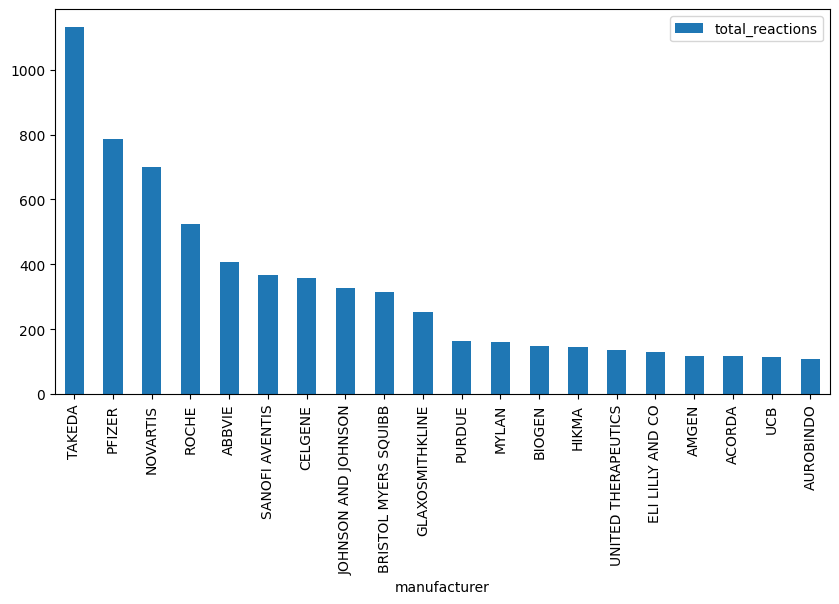

In [ ]:
query = '''MATCH (m:Manufacturer)-[:REGISTERED]-(c:Case)-[:HAS_REACTION]-(r:Reaction)
RETURN m.manufacturerName AS manufacturer,
       COUNT(DISTINCT r) AS total_reactions
ORDER BY total_reactions DESC
'''

with driver.session(database="neo4j") as session:
    result = session.run(query)
    data = [record.data() for record in result]
    
data_df = pd.DataFrame(data)
data_df = data_df.head(20)
data_df.plot(kind='bar', x='manufacturer', y='total_reactions', figsize=(10, 5))

C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\3396983310.py:9: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:


                                   drug  reactionCount
0                               CUVITRU            528
1   HUMAN NORMAL IMMUNOGLOBULIN; LIQUID            468
2   Human Immunoglobulin; Hyaluronidase            281
3                           Teduglutide            134
4                           Lanadelumab             95
5                               NINLARO             91
6                             Ponatinib             86
7                      GAMMAGARD LIQUID             85
8                   Parathyroid Hormone             83
9                            Brigatinib             78
10                   ALFA 1 ANTITRYPSIN             78
11                          Idursulfase             57
12                        GAMMAGARD S/D             56
13                             Ixazomib             52
14                            Icatibant             40
15                             ALUNBRIG             39
16                 C1 Inhibitor (Human)             38
17        

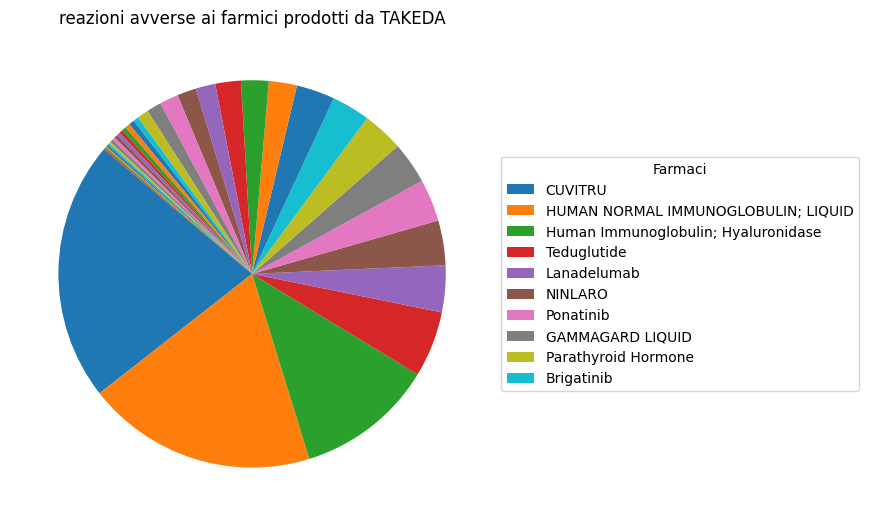

In [ ]:
query = '''
MATCH (m:Manufacturer)-[:REGISTERED]-(c:Case)-[:IS_PRIMARY_SUSPECT]-(d:Drug),
      (c)-[:HAS_REACTION]-(r:Reaction)
WHERE m.manufacturerName = 'TAKEDA'
RETURN d.name AS drug, COUNT(DISTINCT r) AS reactionCount
ORDER BY reactionCount DESC
'''

with driver.session(database="neo4j") as session:
    result = session.run(query)
    data = [record.data() for record in result]

data_df = pd.DataFrame(data)
print(data_df)
# Grafico a torta con legenda separata
plt.figure(figsize=(8, 6))
patches, texts = plt.pie(
    data_df["reactionCount"],
    labels=None,  # tolgo le etichette dal grafico
    startangle=140
)
plt.title('reazioni avverse ai farmici prodotti da TAKEDA')
# Legenda a parte
plt.legend(
    patches[:10],
    data_df["drug"],
    title="Farmaci",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.tight_layout()
plt.show()


C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\746918833.py:8: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:


                           drug  TerapyCount
0                   Teduglutide           22
1           Parathyroid Hormone            7
2                       NINLARO            7
3                      Ixazomib            5
4                    BORTEZOMIB            3
5                 DEXAMETHASONE            3
6                    Brigatinib            3
7                     Ponatinib            3
8                    Vancomycin            3
9                  LANSOPRAZOLE            2
10         OMEPRAZOLE MAGNESIUM            2
11                 Pantoprazole            2
12                     REVLIMID            2
13                  Idursulfase            2
14                 Pomalidomide            2
15                  Lanadelumab            2
16  PIPERACILLIN AND TAZOBACTAM            2
17                   OMEPRAZOLE            1
18                  NEXIUM 24HR            1
19              DIPHENHYDRAMINE            1


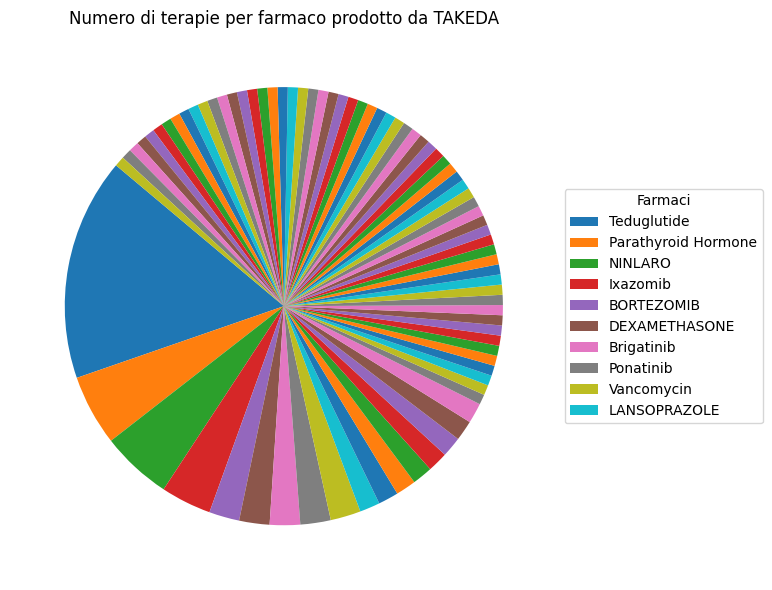

In [ ]:
query = '''
MATCH (m:Manufacturer)-[:REGISTERED]-(c:Case)-[:RECEIVED]-(t:Therapy)-[:PRESCRIBED]-(d:Drug)
WHERE m.manufacturerName = 'TAKEDA'
RETURN d.name AS drug, COUNT(DISTINCT c) AS TerapyCount
ORDER BY TerapyCount DESC
'''

with driver.session(database="neo4j") as session:
    result = session.run(query)
    data = [record.data() for record in result]

data_df = pd.DataFrame(data)
print(data_df.head(20))

# Grafico a torta con legenda separata
plt.figure(figsize=(8, 6))
patches, texts = plt.pie(
    data_df["TerapyCount"],
    labels=None,  # tolgo le etichette dal grafico
    startangle=140
)

# Legenda a parte
plt.title('Numero di terapie per farmaco prodotto da TAKEDA')
plt.legend(
    patches[:10],
    data_df["drug"],
    title="Farmaci",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.tight_layout()
plt.show() 

C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\8850313.py:8: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:


                   drug  reactionCount
0                LYRICA            320
1               IBRANCE            188
2            XELJANZ XR            185
3               XELJANZ            130
4            GENOTROPIN             87
..                  ...            ...
70            LYRICA CR              1
71              EFFEXOR              1
72     FENTANYL CITRATE              1
73  TAFAMIDIS MEGLUMINE              1
74           ADRIAMYCIN              1

[75 rows x 2 columns]


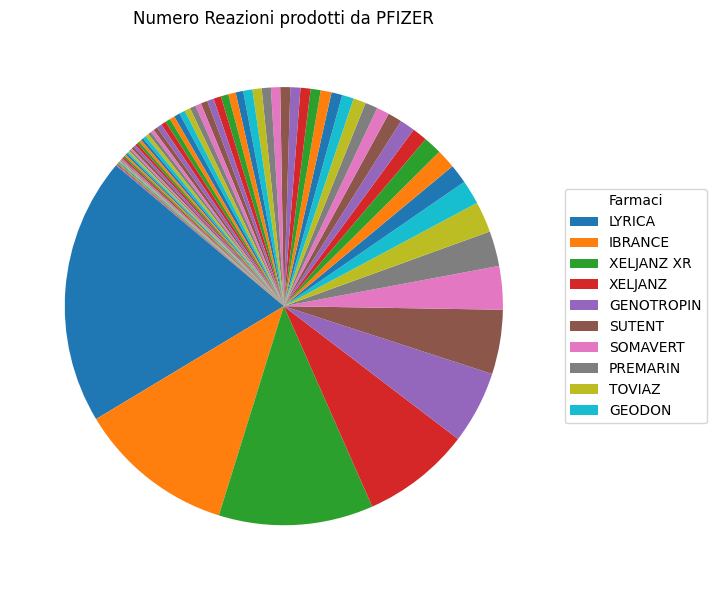

In [ ]:
query = '''MATCH (m:Manufacturer)-[:REGISTERED]-(c:Case)-[:IS_PRIMARY_SUSPECT]-(d:Drug),
      (c)-[:HAS_REACTION]-(r:Reaction)
WHERE m.manufacturerName = 'PFIZER'
RETURN d.name AS drug, COUNT(DISTINCT r) AS reactionCount
ORDER BY reactionCount DESC
'''

with driver.session(database="neo4j") as session:
    result = session.run(query)
    data = [record.data() for record in result]

data_df = pd.DataFrame(data)
print(data_df)
plt.figure(figsize=(8, 6))
patches, texts = plt.pie(
    data_df["reactionCount"],
    labels=None,  # tolgo le etichette dal grafico
    startangle=140
)
plt.title('Numero Reazioni prodotti da PFIZER')
plt.legend(
    patches[:10],
    data_df["drug"],
    title="Farmaci",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.tight_layout()
plt.show()

C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\1800736182.py:8: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:


                drug  TerapyCount
0             LYRICA           21
1            IBRANCE           14
2         XELJANZ XR           12
3       PRILOSEC OTC            9
4         OMEPRAZOLE            8
5             NEXIUM            8
6            XELJANZ            7
7       PANTOPRAZOLE            7
8        NEXIUM 24HR            6
9           PROTONIX            6
10       BINIMETINIB            6
11         DOCETAXEL            5
12    PREVACID 24 HR            5
13        CYTARABINE            5
14        PREDNISONE            5
15        GENOTROPIN            4
16          TAXOTERE            4
17  CYCLOPHOSPHAMIDE            4
18     LIDOCAINE HCL            4
19          PREVACID            4


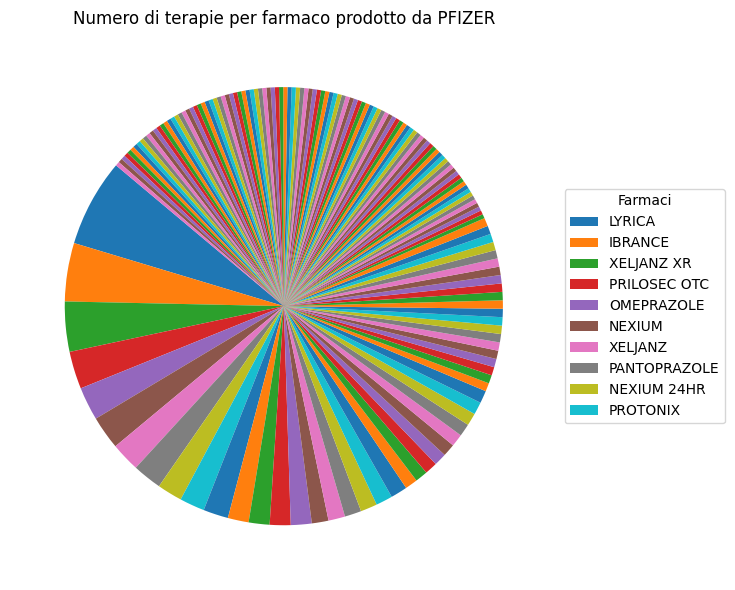

In [ ]:
query = '''
MATCH (m:Manufacturer)-[:REGISTERED]-(c:Case)-[:RECEIVED]-(t:Therapy)-[:PRESCRIBED]-(d:Drug)
WHERE m.manufacturerName = 'PFIZER'
RETURN d.name AS drug, COUNT(DISTINCT c) AS TerapyCount
ORDER BY TerapyCount DESC
'''

with driver.session(database="neo4j") as session:
    result = session.run(query)
    data = [record.data() for record in result]

data_df = pd.DataFrame(data)
print(data_df.head(20))

# Grafico a torta con legenda separata
plt.figure(figsize=(8, 6))
patches, texts = plt.pie(
    data_df["TerapyCount"],
    labels=None,  # tolgo le etichette dal grafico
    startangle=140
)

# Legenda a parte
plt.title('Numero di terapie per farmaco prodotto da PFIZER')
plt.legend(
    patches[:10],
    data_df["drug"],
    title="Farmaci",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.tight_layout()
plt.show() 

In [ ]:
query = '''MATCH (t:Therapy)-[:PRESCRIBED]->(d:Drug)
RETURN count(DISTINCT t) AS TherapyCount

'''

with driver.session(database="neo4j") as session:
    result = session.run(query)
    data = [record.data() for record in result]
data = pd.DataFrame(data)
data.head(20)


C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\1657427696.py:6: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:


,TherapyCount
0,1719


In [ ]:
query = '''MATCH (t:Therapy)-[:PRESCRIBED]-(d:Drug)
RETURN count(t) AS TherapyCount

'''

with driver.session(database="neo4j", default_access_mode="WRITE") as session:
    result = session.run(query)
    data = [record.data() for record in result]
data = pd.DataFrame(data)
data.head(20)

C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\1101935525.py:6: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j", default_access_mode="WRITE") as session:


,TherapyCount
0,5441


# Seconda Research question

In [ ]:
query = '''CALL gds.graph.project.cypher(
  'DrugSimilarityGraph',
  'MATCH (d:Drug)-[:IS_PRIMARY_SUSPECT]-(:Case)-[:HAS_REACTION]-(:Reaction)
   RETURN id(d) AS id, labels(d) AS labels',
  'MATCH (d1:Drug)-[:IS_PRIMARY_SUSPECT]-(:Case)-[:HAS_REACTION]-(r:Reaction)-[:HAS_REACTION]-(:Case)-[:IS_PRIMARY_SUSPECT]-(d2:Drug)
   WHERE id(d1) < id(d2)
   RETURN id(d1) AS source, id(d2) AS target'
)
YIELD graphName, nodeCount, relationshipCount'''



with driver.session(database="neo4j") as session:
    result = session.run(query)
    result = [record.data() for record in result]
df = pd.DataFrame(result)



C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\2642842939.py:13: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:
Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.FeatureDeprecationWarning} {category: DEPRECATION} {title: This feature is deprecated and will be removed in future versions.} {description: The query used a deprecated procedure. ('gds.graph.project.cypher' has been replaced by 'gds.graph.project Cypher projection as an aggregation function')} {position: line: 1, column: 1, offset: 0} for query: "CALL gds.graph.project.cypher(\n  'DrugSimilarityGraph',\n  'MATCH (d:Drug)-[:IS_PRIMARY_SUSPECT]-(:Case)-[:HAS_REACTION]-(:Reaction)\n   RETURN id(d) AS id, labels(d) AS labels',\n  'MATCH (d1:Drug)-[:IS_PRIMARY_SUSPECT]-(:Case)-[:HAS_REACTION]-(r:Reaction)-[:HAS_REACTION]-(:Case)-[:IS_PRIMARY_SUSPECT

In [ ]:
query = '''
CALL gds.wcc.stream('DrugSimilarityGraph')
YIELD  componentId, nodeId
RETURN componentId, count(*)AS num_component_in_component, COLLECT(gds.util.asNode(nodeId).name) AS nodes
ORDER BY componentId
'''

with driver.session(database="neo4j") as session:
    result = session.run(query)
    result = [record.data() for record in result]
result = pd.DataFrame(result)
result

C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\668448375.py:8: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:


,componentId,num_component_in_component,nodes
0,0,593,"[AFINITOR, CLONAZEPAM, DEXAMETHASONE, KEPPRA, LISINOPRIL, Belimumab, PREDNISONE, REVLIMID, LYRICA, FABRAZYME, METOPROLOL, CARVEDILOL, Velaglucerase alfa, ERIVEDGE, BORTEZOMIB, VELCADE, XYREM, PLAVIX, ATORVASTATIN CALCIUM, DEXAMETHASONE ORAL, METFORMIN, THALOMID, AMLODIPINE, MYRBETRIQ, CLOPIDOGREL, DEXTROAMPHET SACCHARAT, OMEPRAZOLE, MIRCERA, GILENYA, PREMARIN, brentuximab vedotin, Vincristine, NEURONTIN, AMPYRA, TECFIDERA, KYPROLIS, Teduglutide, ENTYVIO, GABAPENTIN, LIPITOR, PROTONIX, HUMIRA, IBRANCE, POMALYST, MORPHINE SULFATE, Metreleptin, VISMODEGIB, MINOXIDIL, TYLENOL, DILAUDID, RAPAMUNE, TERIFLUNOMIDE, CELEBREX, MYCOPHENOLATE MOFETIL, NEXIUM, METHOTREXATE, CYTARABINE, GAMUNEX C, ELIQUIS, XELJANZ, EXTAVIA, VINCRISTINE SULFATE, MERCAPTOPURINE, TOVIAZ, RELPAX, BOSULIF, Ixazomib, XELJANZ XR, ESTRADIOL, APIXABAN, PANTOPRAZOLE, DABRAFENIB, GSK1120212, MEDROL, POLYETHYLENE GLYCOL 3350, NUPLAZID, carfilzomib, OTEZLA, EFFEXOR, Niraparib, CELLCEPT, Ponatinib, REMODULIN, ADCIRCA, FENTANYL CITRATE, AGALSIDASE BETA, DEXAMETHASONE IV, VELTASSA, TOPAMAX, OXYCODONE AND ACETAMINOPHEN, NAGLAZYME, LINAGLIPTIN, LOSARTAN, TOCILIZUMAB, ZYKADIA, KYMRIAH, NINLARO, SUTENT, PREMPRO, OCREVUS, ...]"
1,141,1,[TRASTUZUMAB]
2,196,1,[AUTOGENE CEVUMERAN]
3,216,1,[Fedratinib]
4,361,1,[talimogene laherparepvec]
5,375,1,[MESNA]
6,392,1,[LIDOCAINE HYDROCHLORIDE]
7,514,1,[Semaglutide B 30 mg/ml PDS290]


In [ ]:
query = '''CALL gds.graph.list() YIELD graphName, schema, degreeDistribution WHERE graphName = 'DrugSimilarityGraph' RETURN schema, degreeDistribution'''
with driver.session(database="neo4j") as session:
    result = session.run(query)
    result = [record.data() for record in result]
print(result)

C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\1226737533.py:2: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:
Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.FeatureDeprecationWarning} {category: DEPRECATION} {title: This feature is deprecated and will be removed in future versions.} {description: The query used a deprecated field from a procedure. ('schema' returned by 'gds.graph.list' is deprecated.)} {position: line: 1, column: 40, offset: 39} for query: "CALL gds.graph.list() YIELD graphName, schema, degreeDistribution WHERE graphName = 'DrugSimilarityGraph' RETURN schema, degreeDistribution"


[{'schema': {'graphProperties': {}, 'nodes': {'Drug': {}}, 'relationships': {'__ALL__': {}}}, 'degreeDistribution': {'min': 0, 'max': 50805, 'p90': 1417, 'p999': 50805, 'p99': 11584, 'p50': 55, 'p75': 382, 'p95': 2895, 'mean': 872.945}}]


In [ ]:
query = '''CALL gds.nodeSimilarity.stream('DrugSimilarityGraph')
YIELD node1, node2, similarity
RETURN gds.util.asNode(node1).name AS Drug1,
       gds.util.asNode(node2).name AS Drug2,
       similarity
ORDER BY similarity DESC, Drug1, Drug2'''

with driver.session(database="neo4j") as session:
    result = session.run(query)
    count = [record.data() for record in result]
count = pd.DataFrame(count)
count.head(20)
count.drop_duplicates(subset = ['Drug1']).head(20)

C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\234643630.py:8: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:


,Drug1,Drug2,similarity
0,ERIBULIN,KUVAN,1.000000
4,KUVAN,ERIBULIN,1.000000
8,ONUREG,ERIBULIN,1.000000
12,Scopolamine Transdermal System,ERIBULIN,1.000000
16,ZYPREXA RELPREVV,ERIBULIN,1.000000
20,BELVIQ,SILDENAFIL CITRATE,0.965517
21,SILDENAFIL CITRATE,BELVIQ,0.965517
22,XELJANZ,XELJANZ XR,0.913551
23,XELJANZ XR,XELJANZ,0.913551
24,LYRICA,REVLIMID,0.897533


In [ ]:
query = '''
MATCH (d:Drug)-[:IS_PRIMARY_SUSPECT]-(:Case)-[:HAS_REACTION]-(r:Reaction)
WHERE d.name IN ['ERIBULIN', 'KUVAN', 'ONUREG', 'Scopolamine Transdermal System', 'ZYPREXA RELPREVV']
RETURN d.name AS Drug, collect(r.description) AS Reactions
'''
   
with driver.session(database="neo4j") as session:
    result = session.run(query)
    result = [record.data() for record in result]

result = pd.DataFrame(result)
result.head(20)


C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\732294620.py:7: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:


,Drug,Reactions
0,ERIBULIN,[Pneumonia]
1,KUVAN,"[Weight increased, Weight increased]"
2,ONUREG,"[Decreased appetite, Fatigue]"
3,Scopolamine Transdermal System,"[Dizziness, Nausea, Vomiting]"
4,ZYPREXA RELPREVV,"[Depressed level of consciousness, Sedation, Post-injection delirium sedation syndrome, Disorientation, Hypertension, Confusional state, Hypotension, Delirium, Agitation]"


In [ ]:
query = '''
MATCH (d:Drug)-[:IS_PRIMARY_SUSPECT]-(:Case)-[:HAS_REACTION]-(r:Reaction)
WHERE d.name IN ['BELVIQ', 'SILDENAFIL CITRATE']
RETURN d.name AS Drug, collect(r.description) AS Reactions
'''
   
with driver.session(database="neo4j") as session:
    result = session.run(query)
    result = [record.data() for record in result]

result = pd.DataFrame(result)
result.head(20)

C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\4113982609.py:7: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:


,Drug,Reactions
0,BELVIQ,"[Drug ineffective, Invasive lobular breast carcinoma, Invasive lobular breast carcinoma]"
1,SILDENAFIL CITRATE,"[Suspected counterfeit product, Drug ineffective]"


In [ ]:
query = '''
MATCH (d:Drug)-[:IS_PRIMARY_SUSPECT]-(:Case)-[:HAS_REACTION]-(r:Reaction)
WHERE d.name IN ['XELJANZ', 'XELJANZ XR']
RETURN d.name AS Drug, collect(r.description) AS Reactions
'''
   
with driver.session(database="neo4j") as session:
    result = session.run(query)
    result = [record.data() for record in result]

result = pd.DataFrame(result)
result.head(20)

C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\3383196264.py:7: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:


,Drug,Reactions
0,XELJANZ,"[Movement disorder, Liver disorder, Underdose, Illness, Coordination abnormal, Hypoaesthesia, Monoplegia, Drug ineffective for unapproved indication, Tremor, Confusional state, Pain, Off label use, Product dose omission issue, Drug ineffective, Condition aggravated, Staphylococcal infection, Weight increased, Swelling, Pain, Pain in extremity, Viral infection, Influenza, Vitamin D increased, Infection, Loss of consciousness, Intentional product misuse, Condition aggravated, Hypoacusis, Feeling abnormal, Stress, Musculoskeletal stiffness, Dysphonia, Intentional product misuse, Ear pain, Product dose omission issue, Headache, Joint swelling, Sensitivity to weather change, Joint stiffness, Laryngospasm, Therapeutic response unexpected, Condition aggravated, Neck pain, Oropharyngeal pain, Muscle spasms, Blood pressure increased, Condition aggravated, Intentional product use issue, Diabetes mellitus, Loss of personal independence in daily activities, Asthenia, Deafness, Death, Drug ineffective, Nasopharyngitis, Mental disorder, Off label use, Infection, Hordeolum, Product use issue, Off label use, Somnolence, Drug ineffective, Pruritus, Product use in unapproved indication, Feeling hot, Headache, Condition aggravated, Pulmonary embolism, Deep vein thrombosis, Memory impairment, Cerebrovascular accident, Mental impairment, Aphasia, Cellulitis, Pulmonary embolism, Deep vein thrombosis, Off label use, Insomnia, Sensitivity to weather change, Intentional product misuse, Basal cell carcinoma, Keratoacanthoma, Bowen's disease, Drug effective for unapproved indication, Condition aggravated, Off label use, Rash macular, Urinary tract infection, Nasopharyngitis, Illness, Influenza, Bronchitis, Localised infection, Cough, Dyspnoea, Urinary tract infection, Rhinorrhoea, Weight increased, Drug hypersensitivity, ...]"
1,XELJANZ XR,"[Nasal discomfort, Musculoskeletal stiffness, Ocular discomfort, Hypoaesthesia, Transient ischaemic attack, Respiratory tract infection, Candida infection, Urinary tract infection, Limb discomfort, Pain in extremity, Arthralgia, Drug ineffective, Foot fracture, Gait disturbance, Peripheral swelling, Urinary tract infection, Foot deformity, Drug ineffective, Circumstance or information capable of leading to medication error, Pain, Cardiac failure congestive, Drug ineffective, Fall, Pain in extremity, Illness, Head injury, Condition aggravated, Dysstasia, Muscular weakness, Multiple sclerosis, Walking aid user, Precancerous skin lesion, Localised infection, Bronchitis, Fall, Scar, Lumbar vertebral fracture, Perioral dermatitis, Infection, Rash, Haematochezia, Influenza, Fatigue, Diarrhoea, Pyrexia, Muscle rupture, Irritable bowel syndrome, Herpes zoster, Gastrointestinal haemorrhage, Oropharyngeal pain, Blister, Gastric disorder, Fall, Product dose omission issue, Death, Memory impairment, Contusion, Accident, Urinary incontinence, Joint range of motion decreased, Gait disturbance, Headache, Feeling hot, Illness, Therapeutic product effect incomplete, Hypertension, Musculoskeletal stiffness, Product dose omission issue, Pain in extremity, Pain of skin, Arthritis, Pain, Mycotic allergy, Infection, Dry eye, Hip fracture, Throat irritation, Osteoporosis, Cough, Lacrimation increased, Upper-airway cough syndrome, Arthralgia, Intentional dose omission, Pain, Product dose omission issue, Pain in extremity, Arthritis, Confusional state, Movement disorder, Femur fracture, Musculoskeletal stiffness, Fall, Arthralgia, Memory impairment, Glycosylated haemoglobin increased, Illness, Condition aggravated, Disability, Pain, Epistaxis, ...]"


In [ ]:
query_louvain = '''
CALL gds.louvain.stream('DrugSimilarityGraph')
YIELD nodeId, communityId
RETURN  communityId, gds.util.asNode(nodeId).name AS Drug
ORDER BY communityId
'''

with driver.session(database="neo4j") as session:
    result = session.run(query_louvain)
    louvain_data = [record.data() for record in result]

df_louvain = pd.DataFrame(louvain_data)
df_louvain.head(20)

C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\764863472.py:8: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:


,communityId,Drug
0,141,TRASTUZUMAB
1,196,AUTOGENE CEVUMERAN
2,216,Fedratinib
3,245,INFLIXIMAB
4,297,LUSPATERCEPT
5,309,"AFSTYLA ANTIHEMOPHILIC FACTOR (RECOMBINANT), SINGLE CHAIN"
6,316,CC 5013
7,335,EVOMELA
8,361,talimogene laherparepvec
9,374,GSK2118436


In [ ]:
query  = '''CALL gds.louvain.stream('DrugSimilarityGraph')
YIELD nodeId, communityId
WITH communityId, count(*) AS size, collect(gds.util.asNode(nodeId).name) AS drugs
RETURN communityId, size, drugs
ORDER BY size DESC'''

with driver.session(database="neo4j") as session:
    result = session.run(query)
    result = [record.data() for record in result]
df = pd.DataFrame(result)
df.head(20)

C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\1501309626.py:7: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:


,communityId,size,drugs
0,554,558,"[AFINITOR, CLONAZEPAM, DEXAMETHASONE, KEPPRA, LISINOPRIL, PREDNISONE, REVLIMID, LYRICA, FABRAZYME, METOPROLOL, CARVEDILOL, Velaglucerase alfa, ERIVEDGE, BORTEZOMIB, VELCADE, XYREM, PLAVIX, ATORVASTATIN CALCIUM, DEXAMETHASONE ORAL, METFORMIN, THALOMID, AMLODIPINE, MYRBETRIQ, CLOPIDOGREL, DEXTROAMPHET SACCHARAT, OMEPRAZOLE, MIRCERA, GILENYA, PREMARIN, brentuximab vedotin, Vincristine, NEURONTIN, AMPYRA, TECFIDERA, KYPROLIS, Teduglutide, ENTYVIO, GABAPENTIN, LIPITOR, PROTONIX, HUMIRA, IBRANCE, POMALYST, MORPHINE SULFATE, Metreleptin, VISMODEGIB, MINOXIDIL, TYLENOL, DILAUDID, RAPAMUNE, TERIFLUNOMIDE, CELEBREX, MYCOPHENOLATE MOFETIL, NEXIUM, METHOTREXATE, CYTARABINE, GAMUNEX C, ELIQUIS, XELJANZ, EXTAVIA, VINCRISTINE SULFATE, MERCAPTOPURINE, TOVIAZ, RELPAX, BOSULIF, Ixazomib, XELJANZ XR, ESTRADIOL, APIXABAN, PANTOPRAZOLE, DABRAFENIB, GSK1120212, MEDROL, POLYETHYLENE GLYCOL 3350, NUPLAZID, carfilzomib, OTEZLA, Niraparib, CELLCEPT, Ponatinib, REMODULIN, ADCIRCA, FENTANYL CITRATE, AGALSIDASE BETA, DEXAMETHASONE IV, VELTASSA, TOPAMAX, OXYCODONE AND ACETAMINOPHEN, NAGLAZYME, LINAGLIPTIN, LOSARTAN, TOCILIZUMAB, ZYKADIA, KYMRIAH, NINLARO, SUTENT, PREMPRO, OCREVUS, BUPRENORPHINE, COBIMETINIB, ...]"
1,583,7,"[Belimumab, EFFEXOR, BUPRENORPHINE ACTAVIS, EMTRICITABINE/RILPIVIRINE/TENOFOVIR ALAFENAMIDE, EMTRICITABINE;TENOFOVIR DISOPROXIL FUMARATE, GUSELKUMAB, EMTRICITABINE/TENOFOVIR ALAFENAMIDE]"
2,141,1,[TRASTUZUMAB]
3,196,1,[AUTOGENE CEVUMERAN]
4,216,1,[Fedratinib]
5,245,1,[INFLIXIMAB]
6,297,1,[LUSPATERCEPT]
7,309,1,"[AFSTYLA ANTIHEMOPHILIC FACTOR (RECOMBINANT), SINGLE CHAIN]"
8,316,1,[CC 5013]
9,335,1,[EVOMELA]


In [ ]:
df_louvain[df_louvain['Drug'].isin(['ERIBULIN', 'KUVAN', 'ONUREG', 'Scopolamine Transdermal System', 
                                    'ZYPREXA RELPREVV','XELJANZ', 'XELJANZ XR','BELVIQ', 'SILDENAFIL CITRATE'])]

,communityId,Drug
70,543,KUVAN
79,543,ERIBULIN
83,543,ONUREG
87,543,ZYPREXA RELPREVV
88,543,Scopolamine Transdermal System
238,543,BELVIQ
250,543,SILDENAFIL CITRATE
516,554,XELJANZ
523,554,XELJANZ XR


In [ ]:
count[count['Drug1'].isin(['ERIBULIN', 'KUVAN', 'ONUREG', 'Scopolamine Transdermal System', 
                                    'ZYPREXA RELPREVV','XELJANZ', 'XELJANZ XR','BELVIQ', 'SILDENAFIL CITRATE'])].sort_values('similarity')

,Drug1,Drug2,similarity
3521,SILDENAFIL CITRATE,HETLIOZ,0.307692
3419,BELVIQ,HETLIOZ,0.318681
2823,BELVIQ,KYLEENA,0.378378
2728,SILDENAFIL CITRATE,KYLEENA,0.388889
1974,SILDENAFIL CITRATE,BUPROPION HYDROCHLORIDE XL,0.482759
...,...,...,...
10,ONUREG,Scopolamine Transdermal System,1.000000
9,ONUREG,KUVAN,1.000000
8,ONUREG,ERIBULIN,1.000000
7,KUVAN,ZYPREXA RELPREVV,1.000000


In [ ]:
query = '''
MATCH (d:Drug)-[:IS_PRIMARY_SUSPECT]-(:Case)-[:HAS_REACTION]-(r:Reaction)
WHERE d.name IN ['Belimumab', 'EFFEXOR', 'BUPRENORPHINE ACTAVIS', 
                 'EMTRICITABINE/RILPIVIRINE/TENOFOVIR ALAFENAMIDE', 
                 'EMTRICITABINE', 'TENOFOVIR DISOPROXIL FUMARATE', 
                 'GUSELKUMAB', 'EMTRICITABINE/TENOFOVIR ALAFENAMIDE']
RETURN d.name AS Drug, collect(r.description) AS Reactions
'''

with driver.session(database="neo4j") as session:
    result = session.run(query)
    data = [record.data() for record in result]

result_df = pd.DataFrame(data)
result_df.head(20)


C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\1593734627.py:10: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:


,Drug,Reactions
0,BUPRENORPHINE ACTAVIS,"[Drug withdrawal syndrome neonatal, Foetal hypokinesia, Foetal biophysical profile score abnormal, Tremor, Apnoea, Developmental delay, Foetal exposure during pregnancy, Poor feeding infant, Crying]"
1,Belimumab,"[Glioblastoma multiforme, Klebsiella sepsis, Plagiocephaly, Foetal exposure during pregnancy, Congenital torticollis, Haemangioma of skin]"
2,EFFEXOR,[Lipase increased]
3,EMTRICITABINE/RILPIVIRINE/TENOFOVIR ALAFENAMIDE,"[Aberrant aortic arch, Foetal exposure during pregnancy, Patent ductus arteriosus]"
4,EMTRICITABINE/TENOFOVIR ALAFENAMIDE,"[Melanocytic naevus, Rash macular, Fontanelle depressed, Renal hypoplasia, Foetal exposure during pregnancy]"
5,GUSELKUMAB,"[Gamma-glutamyltransferase increased, Lipase increased, Gastroenteritis]"


In [ ]:
query = '''MATCH (d:Drug)-[:IS_PRIMARY_SUSPECT]-(:Case)-[:HAS_REACTION]-(r:Reaction)
WHERE d.name in['ORILISSA','ALDURAZYME','VUMERITY', 'LUPKYNIS','LIDOCAINE HYDROCHLORIDE'] RETURN d.name AS Drug, collect(r.description) AS Reactions '''

with driver.session(database="neo4j") as session:
    result = session.run(query)
    data = [record.data() for record in result]

result_df = pd.DataFrame(data)
result_df.head(5)



C:\Users\Utente\AppData\Local\Temp\ipykernel_22540\3599783983.py:4: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session(database="neo4j") as session:


,Drug,Reactions
0,ALDURAZYME,"[Cartilage operation, Productive cough]"
1,LIDOCAINE HYDROCHLORIDE,"[Foreign body in gastrointestinal tract, Removal of foreign body from oesophagus]"
2,LUPKYNIS,[Angioedema]
3,ORILISSA,[Abnormal uterine bleeding]
4,VUMERITY,"[Seizure like phenomena, Multiple sclerosis]"
